In [1]:
import real_stuff.evaluating as evaluating
import real_stuff.simulating as simulating
import real_stuff.training as training
from real_stuff.basic_imports import *

import importlib

Situation 1: sampling 10_000 X_i ~ 1D uniform.
X:
 [0.375 0.951 0.732 ... 0.947 0.397 0.217]
Unnormalized funcs(X):
[[0.458 0.542]
 [0.65  0.35 ]
 [0.577 0.423]
 ...
 [0.649 0.351]
 [0.466 0.534]
 [0.406 0.594]]
Normalized funcs(X) = Y probabilities:
[[0.458 0.542]
 [0.65  0.35 ]
 [0.577 0.423]
 ...
 [0.649 0.351]
 [0.466 0.534]
 [0.406 0.594]]
Euclidean distance between those: 0.0


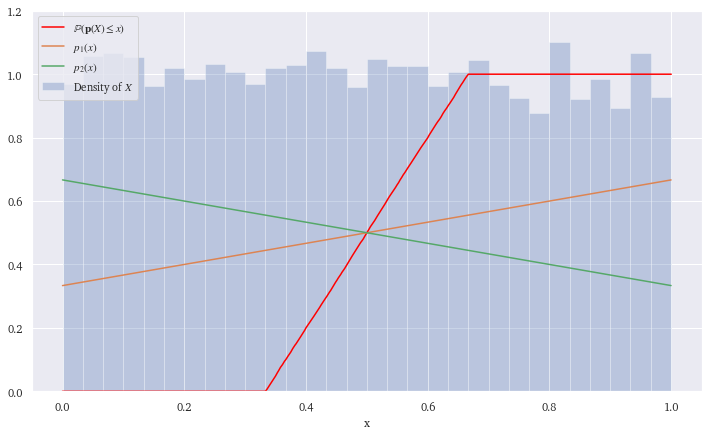

In [2]:
importlib.reload(simulating)
situation = 1
X, funcs, Y_prob = simulating.create_dataset(str(situation), viz=True)

Max 0/1-accuracy during training: 0.5846
Model: "L-is-5-and-p_0-is-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
p_0->p_1 (Dense)             (None, 16)                32        
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
p_1->p_2 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
p_2->p_3 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
p_3->p

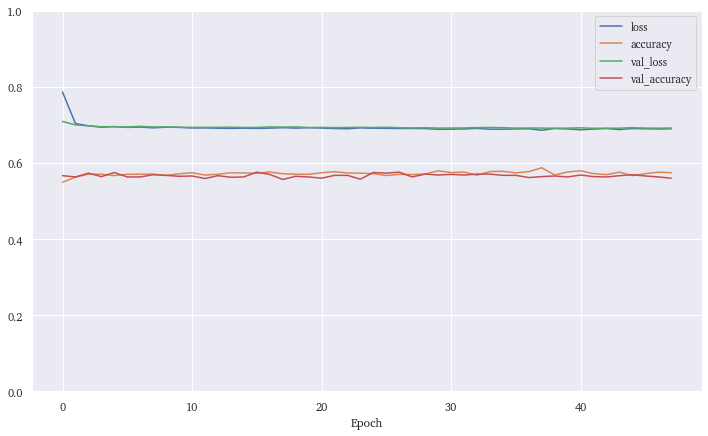

One-hot test [TODO: model.loss_fn] is 0.682; probability vector's is 0.688.


In [4]:
importlib.reload(training)
model, *test_sets = training.train_network(X, Y_prob, viz=1)

In [18]:
importlib.reload(evaluating)
losses = evaluating.test_loss(model, *test_sets)
# model.save(f"{round(l, 4)}_{round(prob_vec_l, 4)}.h5")

{'One-hot log-like': 0.6712665, 'One-hot KL': 0.6712649, 'Probability vec log-like': 0.6769146, 'Probability vec KL': 0.0016676652}


Some examples from test set:
X:
[[0.72 ]
 [0.687]
 [0.096]
 ...
 [0.947]
 [0.397]
 [0.217]]
True:
[[0.573 0.427]
 [0.562 0.438]
 [0.365 0.635]
 ...
 [0.649 0.351]
 [0.466 0.534]
 [0.406 0.594]]
Predict:
[[0.582 0.418]
 [0.577 0.423]
 [0.403 0.597]
 ...
 [0.615 0.385]
 [0.491 0.509]
 [0.415 0.585]]


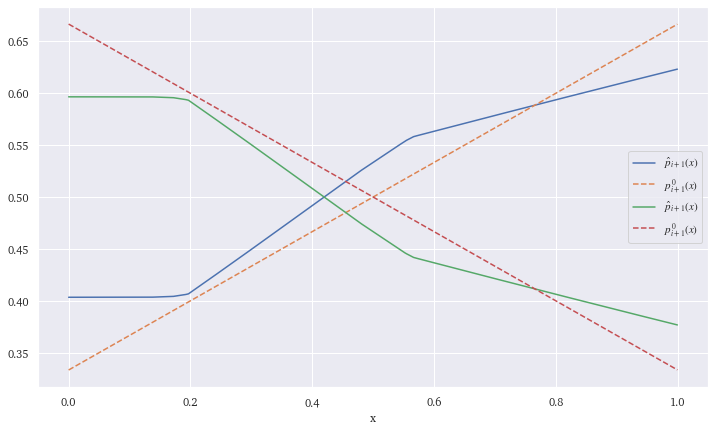

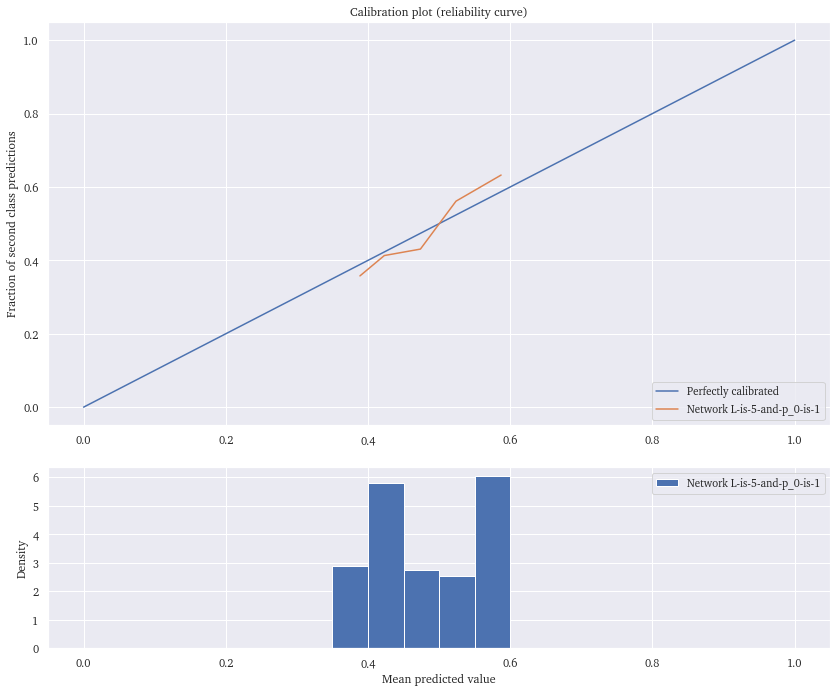

In [7]:
importlib.reload(evaluating)
evaluating.visualize(model, *test_sets)

In [14]:
print(evaluating.get_sparsity(model))

Biases > 0.001:  22  out of 98. 
Weights > 0.001: 124 out of 1600.
